# Задания к уроку 3

### Нарисуйте график функции y = k*cos(x - a) + b

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

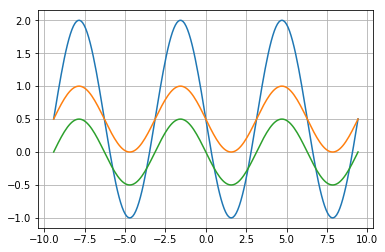

In [2]:
k = 1.5
a = 3.14
b = 0.5
x = np.linspace(-3*np.pi, 3*np.pi, 201)
plt.plot(x, k*np.sin(x-a)+b)
k = 0.5
plt.plot(x, k*np.sin(x-a)+b)
b = 0.
plt.plot(x, k*np.sin(x-a)+b)
plt.grid(True)

### Напишите код, который будет переводить полярные координаты (R, a) в декартовы (x, y)

In [3]:
# Угол в радианах
R = 1
a = math.pi/2
def pol_to_dec(R, a):
    x = R*np.cos(a)
    y = R*np.sin(a)
    return x,y
x, y = pol_to_dec(R, a)
print(x, y)

6.123233995736766e-17 1.0


### Напишите код, который будет рисовать график окружности в полярных координатах

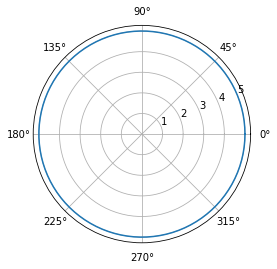

In [4]:
R = 5
a = np.linspace(0, 2*math.pi, 100)
R = np.linspace(R, R, 100)
plt.polar(a, R)

### Напишите код, который будет рисовать график прямой линии в полярных координатах

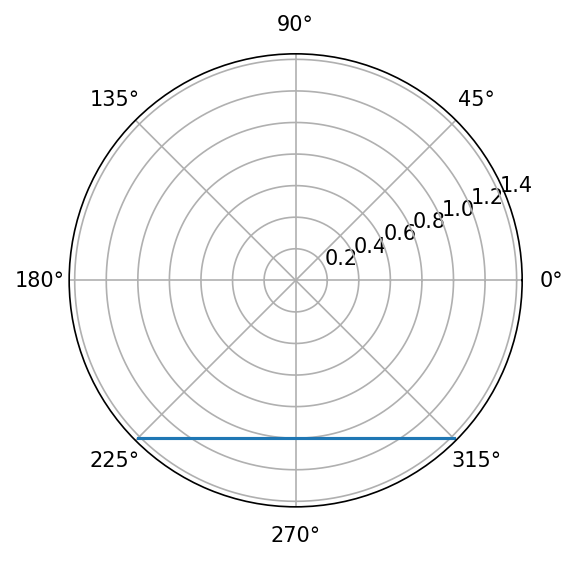

In [5]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(4, 4), dpi=150, facecolor='w', edgecolor='k')

# p - длина нормали из полюса на прямую
# a - угол между полярной осью и нормалью к прямой
p = 1
a = 3*math.pi/2
if p == 0:
    fi = np.linspace(a-math.pi/2, a-math.pi/2 , 100)
    r = np.linspace(0, 10, 100)
    plt.polar(fi, r)
    fi = np.linspace(a+math.pi/2, a+math.pi/2 , 100)
    r = np.linspace(0, 10, 100)
    plt.polar(fi, r)
else:
    fi = np.linspace(a - math.pi/4, a + math.pi/4, 100)
    r = p/np.cos(fi - a)
    plt.polar(fi, r)

### Решите систему уравнений

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


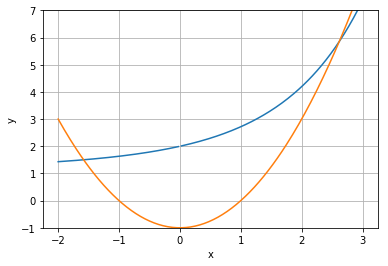

In [6]:
x = np.linspace(-2, 3, 201)
plt.plot(x, (np.exp(x)-1)/x+1)
plt.plot(x, x**2-1)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1,7)
plt.grid(True)
plt.show()

In [7]:
# Численное решение пары точек - корней этой системы (найдется ближайший корень к н.у.)
from scipy.optimize import fsolve
def equations(p):
    x, y = p
    return (y - x**2 + 1, np.exp(x) + x*(1-y) - 1)

x1, y1 = fsolve(equations, (-1, 2))

print(x1, y1)

-1.5818353528924665 1.5022030836705904


### Решите систему уравнений и неравенств 

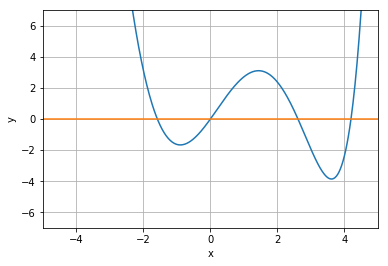

In [8]:
# Подставим первое выражение во воторое и получим: e^x + 2x - x^3 - 1 > 0 

x = np.linspace(-5, 5, 501)
plt.plot(x, (np.exp(x)+2*x-x**3-1))
y = np.linspace(0, 0, 501)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-7,7)
plt.xlim(-5,5)
plt.grid(True)
plt.show()

In [9]:
# Численное решение пары точек - корней этой системы (найдется ближайший корень к н.у.)
from scipy.optimize import fsolve
def equations(p):
    x, y = p
    return (y, np.exp(x)+2*x-x**3-1-y)

x1, y1 = fsolve(equations, (-2, 0))
print(x1, y1)

-1.5818353528958984 0.0


In [10]:
x1, y1 = fsolve(equations, (0, 0))
print(x1, y1)

0.0 0.0


In [11]:
x1, y1 = fsolve(equations, (2, 0))
print(x1, y1)

2.6181455730853957 0.0


In [12]:
x1, y1 = fsolve(equations, (4, 0))
print(x1, y1)

4.200105841155202 0.0


In [13]:
# Решение: (-00 , -1.5818) u (0, 2.6181) u (4.2001, +00)

### Игла Бюффона 

In [14]:
# Классическая задача про иглу Бюффона:
# - Иголку длиной b=10 см наудачу бросают на разлинованную бумагу, где расстояние между соседними линиями тоже a=10 см.
# - С какой вероятностью упавшая иголка пересечет линию бумаги?
# - Сделать расчеты, взяв другие (неравные значения a и b)

In [15]:
# Представим, что линии являются горизонтальными (параллельны оси x)
# Длина иглы
needle_length = 10
# Расстояние между линиями
interval = 10
# Число блосаний
N = 100000

# Функция возвращает, пересекла ли игла линию
def is_inters(needle_length, interval):
    import random
    # y - расстояние от нижней линии до середины иголки
    y = random.uniform(0, interval)
    # a = угол иголки
    a = random.uniform(0, math.pi/2)
    # l - проекция длины иголки на ось y
    l = needle_length*math.sin(a)
    # Возврящаем пересекла ли игла линию или нет
    return ((y + l/2 >= interval) | (y - l/2 <= 0))

In [16]:
# Функция возвращает вероятность пересечения иглой линии
def get_prob(N, needle_length, interval):
    inters = 0
    for i in range(N):
        if is_inters(needle_length, interval):
            inters += 1
    return inters/N

In [17]:
# Вероятность пересечения
get_prob(N, needle_length, interval)

0.636

In [18]:
# 2, деленная на вероятность пересечения, должно приближаться к числу ПИ

inters_prob = get_prob(N, needle_length, interval)
2/inters_prob

3.1376486461046094

In [19]:
# При уменьшении длины иглы и увеличении интервала между линиями вероятность пересечения уменьшается

### Задача про стадион 

In [20]:
#- Мачта освещения футбольного стадиона содержит полотно из 20 рядов по 50 ламп, т.е. всего 1000 ламп.
#- Вероятность "перегорания" каждой лампы Р = 0.001 (за 2 часа работы, пока идет матч)
#- перед началом матча все лампы исправны, по нормативам игру можно проводить, должно работать не менее 90% ламп 
#- достаточна ли такая надежность ламп для проведения матча (т.е. требуется, чтобы до конца игры перегорело не более 100 ламп)?

In [21]:
total_lamps = 1000
# Вероятность отказа одной лампы за два часа
P = 0.001
# Количество экспериментов
N = 1000

# Функция возвращает количество перегоревших ламп за матч
def get_broken_lamp_cnt(total_lamps, P):
    import random
    lamp_cnt = 0
    
    for _ in range(total_lamps):
        # Выбираем случайное число. Если оно равно 0 (вероятность этого события равно 0,001), то считаем, что лампа перегорела
        if random.randint(0, (int)(1/P)-1) == 0:
            lamp_cnt += 1
    return lamp_cnt

In [22]:
# Функция возвращает среднее количество отказавших ламп за N экспериментов (матчей)
def get_prob_match(N, total_lamps, P):
    lamp_cnt = 0
    for _ in range(N):
        lamp_cnt += get_broken_lamp_cnt(total_lamps, P)
    return lamp_cnt/N

In [23]:
get_prob_match(N, total_lamps, P)

0.935

In [24]:
# То есть в среднем будет отказывать одна лампа, следовательно, надежность ламп достаточна

In [25]:
# - Какие лампы (с каким максимальным параметром Р) необходимо купить, чтобы можно было проводить 
# подряд несколько игр на протяжении 10 часов без выключения мачт?
# Примечание: задача из реальной жизни; возможно, она недоформулирована, если так - надо додумать самому

In [26]:
# Будем считать, что вероятность отказа лампы будет расти линейно с увеличением времени ее работы.
# Время работы увеличилось в 5 раз, следовательно, в 5 раз увеличится вероятность отказа лампы 

In [27]:
get_prob_match(N, total_lamps, 5*P)

5.049

In [28]:
# Среднее число отказавших ламп равно 5

In [29]:
# Подберем максимальную вероятность отказа одной лампы за два часа так, чтобы не было выключения мачт

In [30]:
P = 0.02

In [31]:
get_prob_match(N, total_lamps, 5*P)

99.926

In [32]:
# То есть достаточно значения P = 0.02

### Парадокс Монти-Холла 

In [33]:
#- Американская телеигра «Let’s Make a Deal» предлагает участникам выбрать одну из трёх дверей: 
#- За одной из дверей находится (равновероятно) автомобиль, за двумя другими дверями — козы. 
#- Вы выбираете одну из дверей, например, номер 1, после этого ведущий, который знает, где находится автомобиль, 
# а где — козы, открывает одну из оставшихся дверей, например, номер 3, за которой находится коза. После этого 
# он спрашивает вас — не желаете ли вы изменить свой выбор и выбрать дверь номер 2? 
#- Увеличатся ли ваши шансы выиграть автомобиль, если вы примете предложение ведущего и измените свой выбор?

In [34]:
N = 10000
# Изменит ли игрок решение
change = False

In [35]:
# Функция возвращает, выиграли ли мы автомобиль или нет

def is_get_car(change):
    import random
    # Индекс двери, за которой будет машина
    car = random.randint(0, 2)
    # Делаем рандомный выбор
    choice1 = random.randint(0, 2)
    # Ведущий рандомно открывает дверь с козой
    goat = random.randint(0, 2)
    while ((goat == car) | (goat == choice1)):
        goat = random.randint(0, 2)
    
    # Моделирование случая изменения решения
    if change == True: 
        choice2 = random.randint(0, 2)
        while ((choice2 == goat) | (choice2 == choice1)):
            choice2 = random.randint(0, 2)
        return choice2 == car
    
    # Моделирование случая сохранения решения
    else:    
        return choice1 == car

In [36]:
# Функция возвращает вероятность выигрыша автомобиля

def get_prob_car(N, change):
    guessed_cnt = 0
    for _ in range(N):
        if is_get_car(change) == True:
            guessed_cnt += 1
    return guessed_cnt/N

In [37]:
get_prob_car(N, change)

0.3331

In [38]:
change = True

In [39]:
get_prob_car(N, change)

0.6647

In [40]:
# То есть при изменении решения вероятность выигрыша увеличивается вдвое

In [41]:
# - А если вы будете подбрасывать монету, и, если выпадет орел - менять выбор, а если решка - нет?

In [42]:
# Функция возвращает вероятность выигрыша автомобиля с учетом монеты

def get_prob_car_coin(N):
    import random
    guessed_cnt = 0
    for _ in range(N):
        coin = (bool)(random.randint(0, 1))
        if is_get_car(coin) == True:
            guessed_cnt += 1
    return guessed_cnt/N

In [43]:
get_prob_car_coin(N)

0.4985

In [44]:
# С учетом монеты вероятность стала равной 0.5

# Задания к уроку 4

### Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [45]:
import numpy as np

In [46]:
np.random.randint(0, 37)

19

In [47]:
for i in range(0, 5):
    a = input()
    x = np.random.randint(0, 37)
    if x == 0:
        print('Zero')
    elif x in (32, 19, 21, 25, 34, 27, 36, 30 , 23, 5, 16, 1, 14, 9, 18, 7, 12, 3):
        print(x, 'красная')
    else:
        print(x, 'черная')
        


12 красная

22 черная

3 красная

34 красная

34 красная


### Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [48]:
# Проверим теорему сложения вероятностей P(A+B+C) = P(A) + P(B) + P(C) = 1, где A, B, C - 
# полная группа несовместных событий

N = 10000
zero_cnt =  0
red_cnt  =  0
black_cnt = 0
for i in range(N):
    x = np.random.randint(0, 37)
    if x == 0:
        zero_cnt += 1
    elif x in (32, 19, 21, 25, 34, 27, 36, 30 , 23, 5, 16, 1, 14, 9, 18, 7, 12, 3):
        red_cnt += 1
    else:
        black_cnt += 1
zero_prob = zero_cnt/N
red_prob = red_cnt/N
black_prob = black_cnt/N
res = zero_prob + red_prob + black_prob
res

1.0

### Сгенерируйте десять выборок случайных чисел х0, …, х9. и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probability')

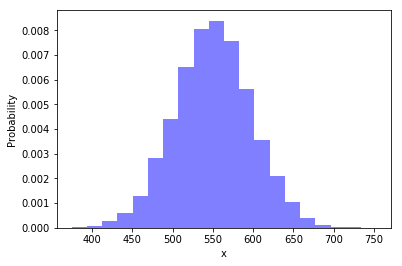

In [50]:
mu0, mu1, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9 = 10, 20, 30, 40, 50, 60, 70, 80, 90, 100
sigma0, sigma1, sigma2, sigma3, sigma4, sigma5, sigma6, sigma7, sigma8, sigma9 = 15, 15, 15, 15, 15, 15, 15, 15, 15, 15
x0 = mu0 + sigma0 * np.random.randn(10000)
x1 = mu1 + sigma1 * np.random.randn(10000)
x2 = mu2 + sigma2 * np.random.randn(10000)
x3 = mu3 + sigma3 * np.random.randn(10000)
x4 = mu4 + sigma4 * np.random.randn(10000)
x5 = mu5 + sigma5 * np.random.randn(10000)
x6 = mu6 + sigma6 * np.random.randn(10000)
x7 = mu7 + sigma7 * np.random.randn(10000)
x8 = mu8 + sigma8 * np.random.randn(10000)
x9 = mu9 + sigma9 * np.random.randn(10000)
x10 = x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9
num_bins = 20
n, bins, patches = plt.hist(x10, num_bins, normed = True, facecolor = 'blue', alpha = 0.5)
plt.xlabel('x')
plt.ylabel('Probability')

### Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.


In [83]:
# Модель Монте-Карло для последовательности независимых испытаний (подбрасывание монеты)
# Проверим вероятность выпадения двух успехов на четырех испытаниях

k, n = 0, 100000
cnt_exp = 4
cnt_luck = 2
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0 , n):
    if x[i] == cnt_luck:
        k += 1
print(k , n, k/n)

37260 100000 0.3726


In [79]:
# Функция вычисления количества сочетаний

def combinations(cnt_exp, cnt_luck):
    import math
    return math.factorial(cnt_exp)/(math.factorial(cnt_luck)*math.factorial(cnt_exp - cnt_luck))

In [80]:
# Через формулу Бернулли получим следующий результат

def get_prob_coin(cnt_exp, cnt_luck):
    return combinations(cnt_exp, cnt_luck)*1/2**cnt_exp

P_n_k = get_prob_coin(cnt_exp, cnt_luck)
P_n_k

0.375

In [ ]:
# Вероятность, полученная методом Монте-Карло сходится к данному значению

### Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [85]:
# Модель Монте-Карло для последовательности независимых испытаний (подбрасывание монеты)
# Проверим вероятность выпадения шести успехов на десяти испытаниях

k, n = 0, 100000
cnt_exp = 10
cnt_luck = 6
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
g = np.random.randint(0, 2, n)
h = np.random.randint(0, 2, n)
j = np.random.randint(0, 2, n)
l = np.random.randint(0, 2, n)

x = a + b + c + d + e + f + g + h + j + l
for i in range(0 , n):
    if x[i] == cnt_luck:
        k += 1
print(k , n, k/n)

20595 100000 0.20595


In [87]:
# Через формулу Бернулли получим следующий результат

P_n_k = get_prob_coin(cnt_exp, cnt_luck)
P_n_k

0.205078125

In [88]:
# Вероятность, полученная методом Монте-Карло сходится к данному значению

### Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [96]:
# Возможные размещения A_n_k (порядок важен)
import itertools
for p in itertools.permutations('01234', 3):
    print(''.join(p))

012
013
014
021
023
024
031
032
034
041
042
043
102
103
104
120
123
124
130
132
134
140
142
143
201
203
204
210
213
214
230
231
234
240
241
243
301
302
304
310
312
314
320
321
324
340
341
342
401
402
403
410
412
413
420
421
423
430
431
432


In [98]:
# Возможные сочетания C_n_k (порядок не важен)

for p in itertools.combinations('01234', 3):
    print(''.join(p))

012
013
014
023
024
034
123
124
134
234


In [100]:
# Возможные размещения A_n_n (перестановки)

for p in itertools.permutations('01234', 5):
    print(''.join(p))

01234
01243
01324
01342
01423
01432
02134
02143
02314
02341
02413
02431
03124
03142
03214
03241
03412
03421
04123
04132
04213
04231
04312
04321
10234
10243
10324
10342
10423
10432
12034
12043
12304
12340
12403
12430
13024
13042
13204
13240
13402
13420
14023
14032
14203
14230
14302
14320
20134
20143
20314
20341
20413
20431
21034
21043
21304
21340
21403
21430
23014
23041
23104
23140
23401
23410
24013
24031
24103
24130
24301
24310
30124
30142
30214
30241
30412
30421
31024
31042
31204
31240
31402
31420
32014
32041
32104
32140
32401
32410
34012
34021
34102
34120
34201
34210
40123
40132
40213
40231
40312
40321
41023
41032
41203
41230
41302
41320
42013
42031
42103
42130
42301
42310
43012
43021
43102
43120
43201
43210


### Дополните код расчетом коэффициента корреляции x и y по формуле

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


0.7297446808750857 0.12913367813851565
0.7297446808750849 0.12913367813851617


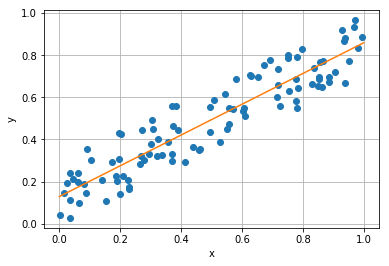

In [101]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Вычисление коэффициентов регрессии вручную (y = a*x + b)
a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

# Вычисление коэффициентов регрессии встроенной функцией
A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

In [111]:
# Расчет коэффициента корреляции с использованием встроенной функции

c = np.corrcoef(x, y)
print(c)

[[1.         0.92797749]
 [0.92797749 1.        ]]


In [102]:
# Рассчет коэффициента корреляции по формуле

In [107]:
x_m = x.mean()
y_m = y.mean()

In [110]:
R = (np.sum((x - x_m)*(y - y_m))/(np.sqrt((np.sum((x-x_m)*(x-x_m)))*(np.sum((y-y_m)*(y-y_m))))))
R

0.9279774870148036

In [112]:
# Результаты сходятся